In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [13]:
pd.set_option('display.max_colwidth', 500)

In [14]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,2


In [17]:
## No missing value
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [18]:
len(df)

5572

In [19]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

For the sake of simplicity we will use only ['lenght'] and ['punct'](showing the # of punctuaitions) to predict whether the label is ham or spam

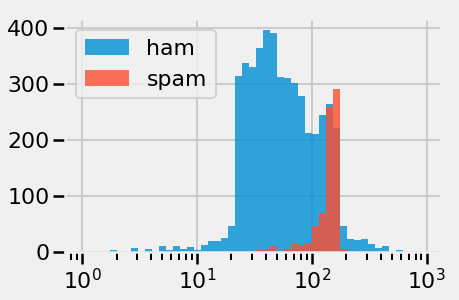

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
sns.set_context('poster')
sns.despine()

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

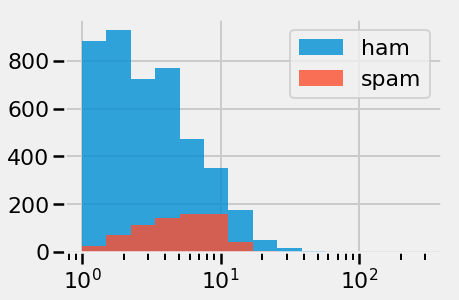

In [26]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

In [32]:
X = df[['length', 'punct']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.3,)

In [33]:
X_train.shape

(3900, 2)

In [34]:
X_test.shape

(1672, 2)

In [35]:
y_test.shape

(1672,)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
model_lr = LogisticRegression(solver='lbfgs')

In [38]:
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
y_pred = model_lr.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [63]:
df2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['ham', 'spam'], columns=['ham', 'spam'])

In [64]:
df2

,ham,spam
ham,1404,44
spam,219,5


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [67]:
accuracy_score(y_test, y_pred)

0.8427033492822966

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
model_nb = MultinomialNB()

In [71]:
model_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
y_pred = model_nb.predict(X_test)

In [73]:
df2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['ham', 'spam'], columns=['ham', 'spam'])

In [74]:
df2

,ham,spam
ham,1438,10
spam,224,0


In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [76]:
accuracy_score(y_test, y_pred)

0.8600478468899522

In [88]:
from sklearn.svm import SVC

In [91]:
model_svc = SVC(gamma='auto')

In [92]:
model_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
y_pred = model_svc.predict(X_test)

In [94]:
df2 = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['ham', 'spam'], columns=['ham', 'spam'])

In [95]:
df2

,ham,spam
ham,1373,75
spam,121,103
